In [174]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [175]:
import stata_setup
stata_setup.config("C:/Program Files/Stata17/", "se")

In [176]:
df = pd.read_csv('full_df.csv', index_col=0)

In [177]:
df['year'] = df['title'].astype(str).str[0:4] # get year variable
# df['year_make_model'] = df['year'] + ' ' + df['make'] + ' ' + df['model'] # get year make model variable
df['title_status'] = df['title.1'].astype(str).str[0:5] == 'Clean' # get clean status true/false
df['title_status'] = df['title_status'].astype(int) # convert to dummy: 1 == clean title , 0 == otherwise
df['end_bid_new'] = df['end_bid'].str.replace(',', '').str.extract('(\d+)') # end bid price
df['num_views_new'] = df['num_views'].str.replace(',', '') # number of auction views
df['num_photos_new'] = df['num_photos'].str.extract('(\d+)') # number of photos
df['milage'] = df['milage'].str.replace(',', '').str.extract('(\d+)') # milage of vehicle
df['engine'] = df['engine'].str.lower().str.replace(' ', '').str.replace('-','').str.replace('.','') # type of engine
df['drivetrain'] = df['drivetrain'].str.lower().str.replace(' ', '').str.replace('-', '') # type of drivetrain
df['transmission'] = df['transmission'].str.lower().str.replace(' ','').str.replace('-','') # type of transmission

In [178]:
working_df = df.drop(columns=['title', 'subtitle', 'VIN', 'location', 'seller', 'num_views', 'end_bid', 'end_date', 'num_photos', 'title.1',])

In [179]:
working_df['e_color'] = working_df['e_color'].str.lower()
working_df['i_color'] = working_df['i_color'].str.lower()
working_df['e_color'] = working_df['e_color'].str.replace('grey', 'gray')
working_df['i_color'] = working_df['i_color'].str.replace('grey', 'gray')

In [180]:
e_color_dict = {
    'blizzard pearl' : 'white',
    'titanium' : 'gray',
    'rosso' : 'red',
    'nero' : 'black',
    'el cap granite' : 'gray',
    'sand dollar pearl' : 'beige',
    'chalk' : 'white',
    'ebony' : 'black',
    'pewter' : 'silver',
    'anthracite' : 'gray',
    'starfire pearl': 'white',
    'emerald' : 'green',
    'magnetic' : 'gray',
    'champagne' : 'beige',
    'thunder cloud metallic' : 'silver',
    'obsidian' : 'black',
    'sparkling graphite metallic' : 'gray',
    'area 51' : 'blue',
    'jade' : 'green',
    'dune' : 'beige',
    'gold' : 'beige',
    'granite' : 'gray',
    'lunar' : 'silver',
    'quicksand' : 'beige',
    'graphite' : 'gray',
    'tan' : 'beige',
    'grigio' : 'silver',
    'gun' : 'gray',
    'garnet pearl' : 'red',
    'khaki' : 'beige',
    'cement' : 'gray',
    'still night' : 'blue',
    'auburn' : 'red',
    'platinum' : 'gray',
    'sapphire' : 'blue',
    'merlot' : 'red',
    'bianco' : 'white',
    'mercury' : 'silver',
    'violet' : 'purple',
    'mahogany' : 'red',
    'ceramic' : 'white',
    'midnight' : 'purple',
    'limestone' : 'green',
    'sandstorm' : 'beige',
    'giallo modena' : 'yellow',
    'ivory' : 'beige',
    'cherry' : 'red',
    'inferno' : 'orange',
    'lead' : 'gray',
    'bronze' : 'brown',
    'mystichrome' : 'blue',
    'smoked quartz tinted clearcoat metallic' : 'blue',
    'moonglow' : 'blue',
    'carbon' : 'black',
    'topaz' : 'brown',
    'nickel' : 'silver',
    'shadow' : 'gray',
    'vallelunga' : 'red',
    'quartz' : 'beige',
    'slate' : 'gray',
    'argento nurburgring' : 'silver',
    'azure' : 'blue',
    'teal' : 'green',
    'incognito' : 'gray',
    'briarwood' : 'brown',
    'aqua' : 'blue',
    'umber' : 'brown',
    'iceberg' : 'blue',
    'vapor' : 'blue',
    'sienna pearlcoat': 'red',
    'antique sage pearl' : 'silver',
    'egyptian sand pearl' : 'beige',
    'beluga' : 'black',
    'terrain' : 'beige',
    'claret' : 'red',
    'hellrot' : 'red',
    'parchment' : 'silver',
    'sun' : 'yellow',
    'thunder cloud' : 'gray',
    'ablaze' : 'red',
    'steel' : 'gray',
    'copper' : 'orange',
    'maroon' : 'red',
    'ruby' : 'red',
    'camouflage sand' : 'beige',
    'macadamia' : 'brown',
    'yuzu' : 'yellow',
    'cream' : 'beige',
    'palladium' : 'beige',
    'melange' : 'beige',
    'desert sand' : 'beige',
    'noble spinel' : 'red',
    'magnesium' : 'silver',
    'terra cotta' : 'beige',
    'sea spray' : 'blue',
    'anvil' : 'gray',
    'bournville' : 'purple',
    'ametrain' : 'purple',
    'ametrin' : 'purple',
    'rhino' : 'gray',
    'panthera' : 'gray',
    'gecko' : 'green',
    'flint' : 'gray',
    'armor' : 'gray',
    'delphin' : 'gray',
    'olive magno' : 'beige',
    'zircon' : 'beige',
    'moonbeam' : 'beige',
    'tungsten' : 'silver',
    'taupe' : 'beige',
    'sienna pearl coat' : 'red',
    'pacific fog' : 'blue',
    'dark baltic' : 'blue',
    'razberry' : 'red',
    'schwarz' : 'black',
    'azzurro' : 'blue',
    'granito' : 'gray',
    'driftwood' : 'beige',
    'seafrost' : 'blue',
    'brick' : 'orange',
    'thunder' : 'gray',
    'walnut' : 'brown',
    'desert sage' : 'green',
    'crystal clearcoat metallic' : 'gray',
    'hot lava' : 'orange',
    'dark olive metallic' : 'green',
    'guard' : 'green',
    'shale' : 'gray',
    'moonstone' : 'silver',
    'flamingo' : 'beige',
    'arctic frost' : 'white',
    'autumnwood' : 'beige',
    'verde' : 'green',
    'mango' : 'orange',
    'sienna tinted' : 'red',
    'harlequin' : 'other',
    'yelow' : 'yellow',
    'tuscadero' : 'red',
    'campagne' : 'beige',
    'olive' : 'green',
    'ipanema' : 'beige',
    'garnet' : 'red',
    'autumn blaze' : 'orange',
    'avalanche' : 'gray',
    'azzuro' : 'blue',
    'burgandy' : 'red',
    'tundra' : 'blue',
    'crush' : 'orange',
    'dolphin' : 'gray',
    'magnolia' : 'white',
    'antelope' : 'beige',
    'onyx' : 'black',
    'scarlet' : 'red',
    'hellraisin' : 'purple',
    'glacier frost' : 'white',
    'blu mehit' : 'blue',
    'antigua' : 'blue',
    'blau' : 'blue',
    'meridian' : 'beige',
    'fire opal' : 'red',
    'lime rush' : 'green',
    'verde' : 'green',
    'amethyst' : 'purple',
    'mirage' : 'beige',
    'crimson' : 'red',
    'linen' : 'beige',
    'cypress' : 'green',
    'custom' : 'other',
    'glacier metallic' : 'white',
    'bornite' : 'purple',
    'argento' : 'silver',
    'charcoal' : 'gray',
    'chocolate' : 'brown',
    'prosecco' : 'beige',
    'savannah' : 'beige',
    'cashmere' : 'beige',
    'rose' : 'red',
    'coral' : 'orange',
    'moorland' : 'green',
    'smoke' : 'gray',
    'giallo' : 'yellow',
    'byzanz' : 'orange',
    'smokin' : 'gray',
    'arctica' : 'white',
    'adobe' : 'beige',
    'cayman metallic' : 'green',
    'bamboo' : 'green',
    'indigo' : 'blue',
    'gobi' : 'beige',
    'fawn' : 'beige',
    'seafoam' : 'blue',
    'absolute zero' : 'white',
    'powder' : 'white',
    'oyster metallic' : 'green',
    'punk\'n metallic' : 'orange',
    'gris' : 'gray',
    'mystic clearcoat metallic' : 'purple',
    'sebring' : 'silver',
    'mystic sea opal' : 'gray',
    'sly' : 'gray'
}

In [181]:
i_color_dict = {
    'oak' : 'brown',
    'palomino' : 'beige',
    'saddle' : 'brown',
    'oyster' : 'white',
    'stone' : 'grey',
    'jet' : 'black',
    'nordkap' : 'black',
    'ecru' : 'white',
    'ash' : 'gray',
    'agate' : 'gray',
    'camel' : 'beige',
    'atacama' : 'brown',
    'terra' : 'brown',
    'chateau' : 'beige',
    'sand' : 'beige',
    'caramel' : 'beige',
    'mocha' : 'brown',
    'java' : 'brown',
    'neutral' : 'beige',
    'cuoio' : 'brown',
    'sandstone' : 'beige',
    'cognac' : 'brown',
    'cinnamon' : 'brown',
    'zebra' : 'other',
    'almond' : 'brown',
    'espresso' : 'brown',
    'saffron' : 'beige',
    'forest edge' : 'beige',
    'mushroom' : 'brown',
    'cocoa' : 'brown',
    'interlagos' : 'other',
    'willow' : 'white',
    'teak' : 'brown',
    'arabica' : 'brown',
    'creme' : 'beige',
    'wheat' : 'beige',
    'kalahari' : 'brown',
    'hickory' : 'brown',
    'sienna' : 'brown',
    'stone' : 'gray',
    'oatmeal' : 'beige',
    'alabaster' : 'white',
    'bordeaux' : 'red',
    'light sand' : 'beige',
    'mulberry' : 'red',
    'raffia' : 'beige',
    'barley' : 'beige',
    'havana' : 'red',
    'lightstone' : 'beige',
    'porcelain' : 'white',
    'chestnut' : 'brown',
    'pecan' : 'brown',
    'sepang' : 'brown',
    'plaid' : 'other',
    'natural' : 'beige',
    'prairie' : 'beige',
    'buffalo' : 'beige',
    'monsoon' : 'beige',
    'amaretto' : 'brown',
    'alpine' : 'white',
    'palisades' : 'white',
    'tobacco' : 'brown',
    'seashell' : 'white',
    'spruce' : 'green',
    'giga amido' : 'black',
    'windsor' : 'brown',
    'tartufo' : 'brown',
    'multi' : 'other',
    'magma' : 'red',
    'blond' : 'beige',
    'iron ore' : 'white',
    'aspen' : 'white',
    'light oak' : 'white',
    'salt creek' : 'other',
    'santa monica' : 'white',
    'tricolor kith' : 'red',
    'navy' : 'blue',
    'crema' : 'beige',
    'yacht club' : 'other',
    'amido' : 'gray',
    'city weave' : 'other',
    'latte' : 'beige',
    'coal' : 'black',
    'brogue' : 'brown',
    'helios' : 'white',
    'natur' : 'beige',
    'mojave' : 'beige',
    'perlino' : 'white',
    'frost' : 'white',
    'havanna' : 'red',
    'paprika' : 'red',
    'boa-boa' : 'green',
    'portland' : 'white',
    'modena' : 'beige',
    'ocean coast' : 'white',
    'sepia' : 'beige',
    'beechwood' : 'beige',
    'carmel' : 'brown',
    'designo corteccia' : 'gray',
    'poppy' : 'red'
}

In [182]:
for old, new in e_color_dict.items():
    working_df['e_color'] = working_df['e_color'].str.replace(old, new, regex = True)
colors = ['black', 'white', 'silver', 'gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'beige', 'camouflage', 'other']
working_df['e_colormatch'] = working_df['e_color'].str.findall('|'.join(colors))

In [183]:
working_df['e_colormatch'] = working_df['e_colormatch'].str[0]

In [184]:
for old, new in e_color_dict.items():
    working_df['i_color'] = working_df['i_color'].str.replace(old, new, regex = True)
for old, new in i_color_dict.items():
    working_df['i_color'] = working_df['i_color'].str.replace(old, new, regex = True)
colors = ['black', 'white', 'silver', 'gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'beige', 'camouflage', 'other']
working_df['i_colormatch'] = working_df['i_color'].str.findall('|'.join(colors))

In [185]:
working_df['i_colormatch'] = working_df['i_colormatch'].str[0]

In [186]:
working_df.head(1)

,id,reserve,num_bids,num_com,make,model,milage,engine,drivetrain,transmission,body_style,e_color,i_color,seller_type,num_highlights,num_equipment,num_modifications,num_known_flaws,num_service_history,num_other_items,num_owner_history,num_seller_notes,num_videos,sold,sentiment_score,year,title_status,end_bid_new,num_views_new,num_photos_new,e_colormatch,i_colormatch
0,1_1,1,16,48,Mercedes-Benz,E63 AMG,38900,55lturbochargedv8,rearwheeldrive,automatic(7speed),Wagon,designo mocha black,black,Private Party,6,13,16,4,2,10,1,2,2.0,1,0.379978,2012,1,49500,17729,129,black,black


In [187]:
trans_dummy = pd.get_dummies(working_df['transmission'], prefix='trans')
trans_dummy['trans_manual(5speed)'] = trans_dummy['trans_manual(5speed)'] + trans_dummy['trans_manual(5speedmanual)']
trans_dummy.drop(columns='trans_manual(5speedmanual)', inplace = True)
trans_dummy['trans_automatic(5speed)'] = trans_dummy['trans_automatic(5s[eed)'] + trans_dummy['trans_automatic(5speed)']
trans_dummy.drop(columns='trans_automatic(5s[eed)', inplace = True)

In [188]:
make_dummy = pd.get_dummies(working_df['make'], prefix='make')
model_dummy = pd.get_dummies(working_df['model'], prefix='model')

In [189]:
ecolor_dummy = pd.get_dummies(working_df['e_colormatch'], prefix='ecolor')
icolor_dummy = pd.get_dummies(working_df['i_colormatch'], prefix='icolor')

In [190]:
reg_df = working_df.join(trans_dummy).join(make_dummy).join(model_dummy).join(ecolor_dummy).join(icolor_dummy)
reg_df.drop(columns=['transmission', 'make', 'model'], inplace = True)

In [192]:
reg_df.drop(columns = ['engine', 'drivetrain', 'body_style', 'e_color' ,'i_color', 'e_colormatch', 'i_colormatch'], inplace= True)

In [194]:
reg_df.to_csv('regression_df.csv')

In [10]:
first_col = reg_df.pop('end_bid_new')

In [11]:
first_col

0        49500
1         7877
2        14300
3        52777
4         8800
         ...  
8400     21000
8401    108000
8402     11000
8403     20750
8404     63000
Name: end_bid_new, Length: 8405, dtype: object

In [12]:
reg_df.insert(0, 'end_bid_new', first_col)

In [13]:
reg_df.drop(columns='id', inplace = True)

In [14]:
reg_df.dropna(inplace = True)

In [15]:
reg_df.dtypes

end_bid_new                    object
reserve                         int64
num_bids                        int64
num_com                         int64
milage                         object
                                ...  
2023 Genesis GV60               uint8
2023 Land Rover Defender        uint8
2023 Land Rover Range Rover     uint8
2023 Nissan Z                   uint8
2023 Toyota Tundra              uint8
Length: 3313, dtype: object

In [16]:
reg_df.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8392 entries, 0 to 8404
Columns: 3313 entries, end_bid_new to 2023 Toyota Tundra
dtypes: float64(2), int32(1), int64(16), uint8(3294)
memory usage: 27.6 MB


In [17]:
reg_df = reg_df.apply(pd.to_numeric)

In [18]:
y = reg_df['end_bid_new']
x = reg_df.iloc[:, 1:]

In [19]:
x = sm.add_constant(x)

In [20]:
model = sm.OLS(y, x)

In [21]:
res = model.fit()

In [22]:
model2 = smf.ols(formula = 'end_bid_new ~ reserve + num_bids + num_com + milage + num_highlights + num_equipment + num_modifications + num_known_flaws + num_service_history + num_other_items + num_videos + sold + sentiment_score + title_status + num_views_new + num_photos_new', data = reg_df).fit()

In [41]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            end_bid_new   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     29.82
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:45:13   Log-Likelihood:                -86638.
No. Observations:                8392   AIC:                         1.799e+05
Df Residuals:                    5086   BIC:                         2.031e+05
Df Model:                        3305                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [24]:
import seaborn as sns

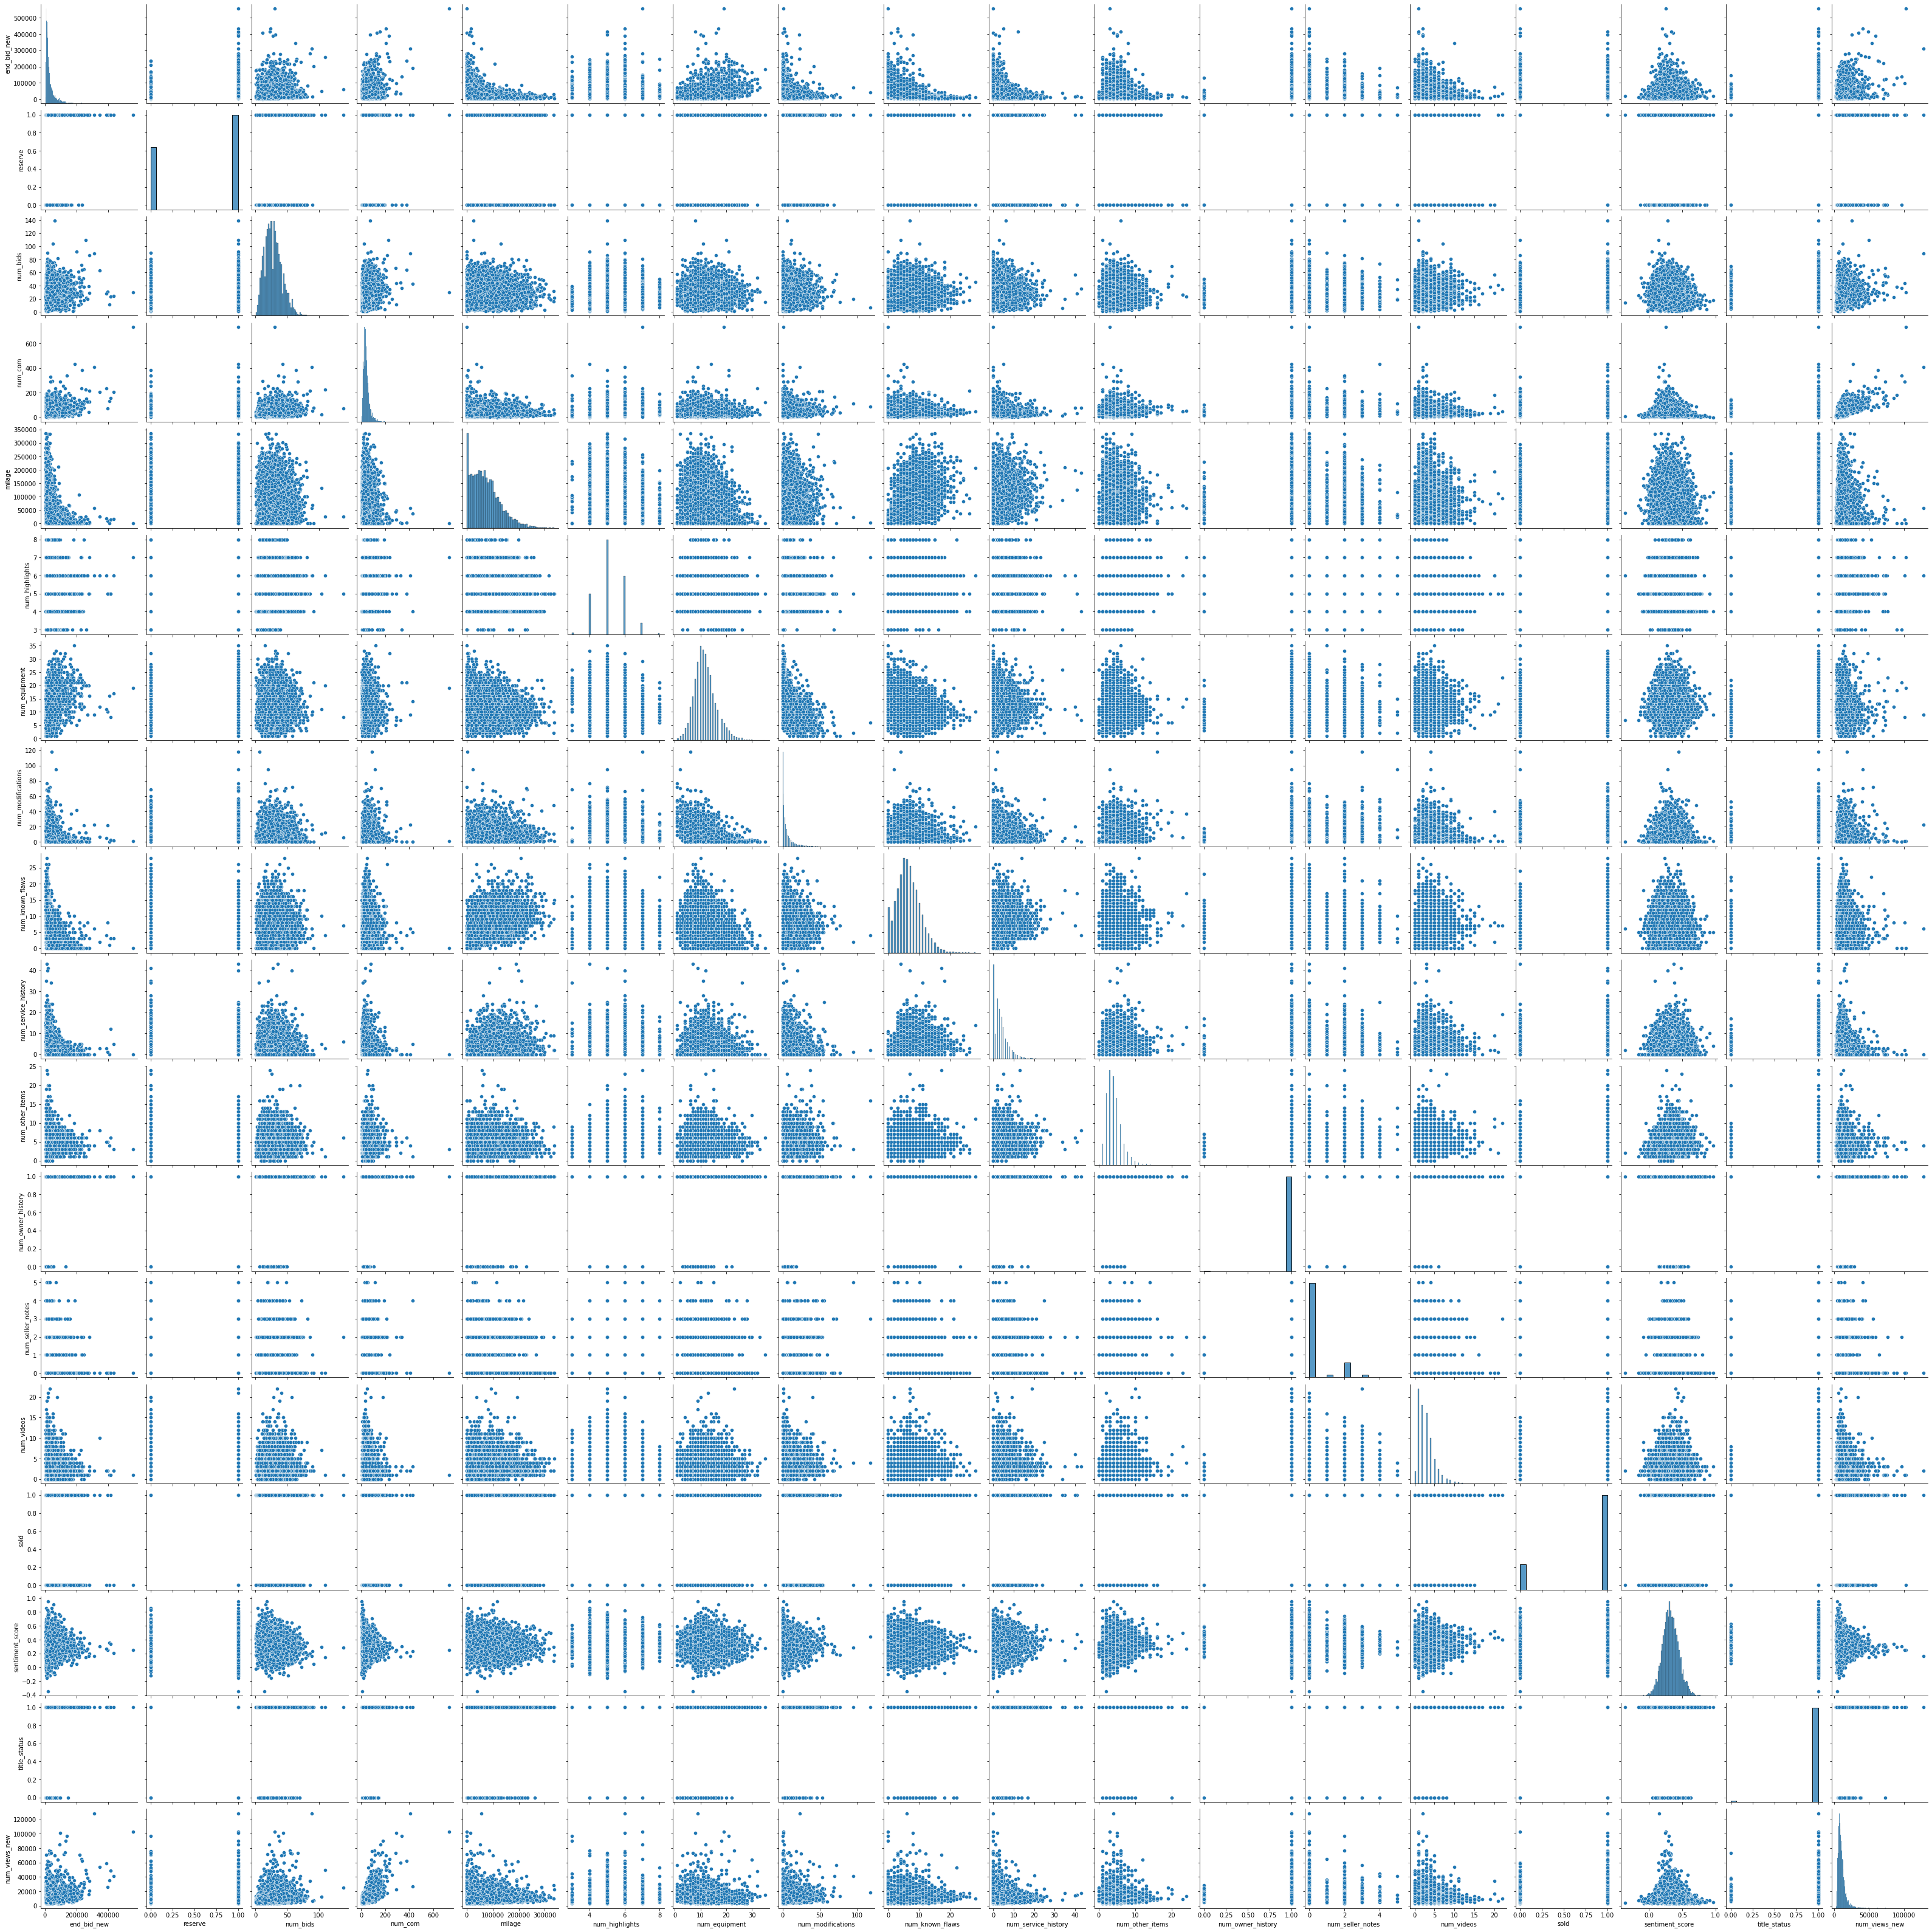

In [26]:
sns.pairplot(reg_df.iloc[:, 0:18])

<AxesSubplot:>

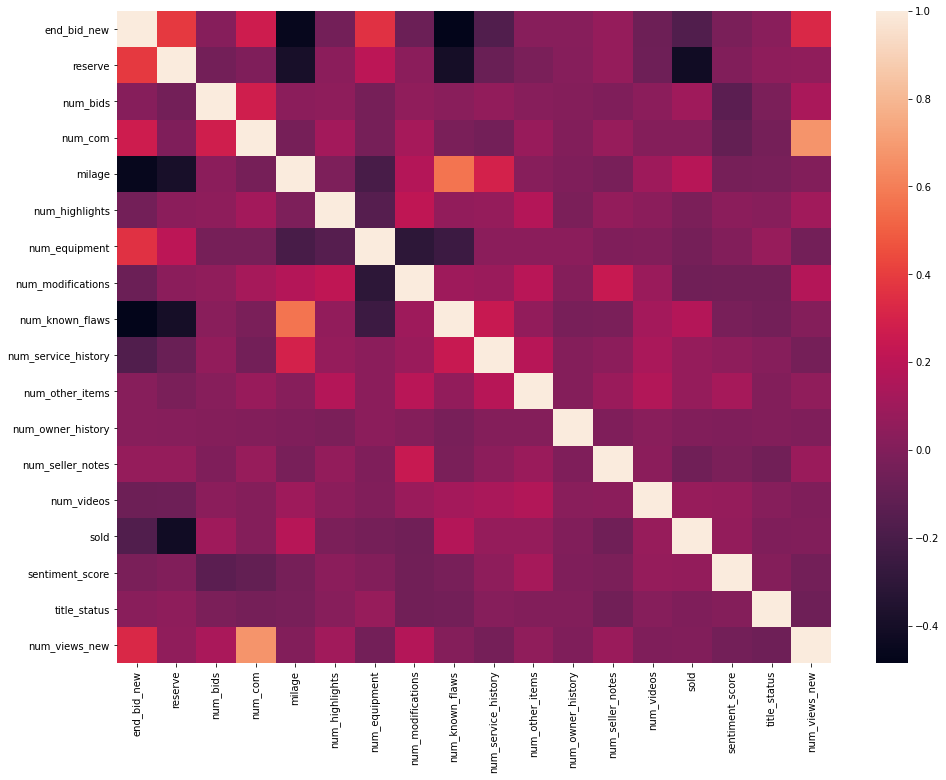

In [32]:
plt.figure(figsize = (16, 12))
sns.heatmap(reg_df.iloc[:, 0:18].corr())


In [48]:
test_df = reg_df[['num_bids', 'sentiment_score']]

<Figure size 1152x864 with 0 Axes>

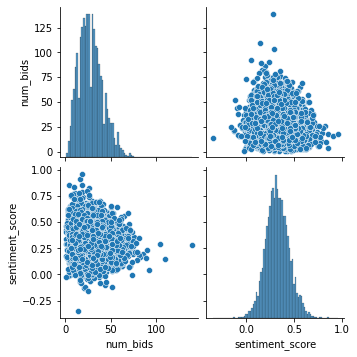

In [52]:
plt.figure(figsize = (16, 12))
sns.pairplot(test_df)

In [23]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            end_bid_new   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     476.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:12:17   Log-Likelihood:                -96570.
No. Observations:                8392   AIC:                         1.932e+05
Df Residuals:                    8375   BIC:                         1.933e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.702e+04   3

In [33]:
reg_df.columns

Index(['end_bid_new', 'reserve', 'num_bids', 'num_com', 'milage',
       'num_highlights', 'num_equipment', 'num_modifications',
       'num_known_flaws', 'num_service_history',
       ...
       '2023 Audi RS 3', '2023 BMW iX', '2023 Cadillac Escalade',
       '2023 Chevrolet Camaro', '2023 Chevrolet Corvette', '2023 Genesis GV60',
       '2023 Land Rover Defender', '2023 Land Rover Range Rover',
       '2023 Nissan Z', '2023 Toyota Tundra'],
      dtype='object', length=3313)

<AxesSubplot:>

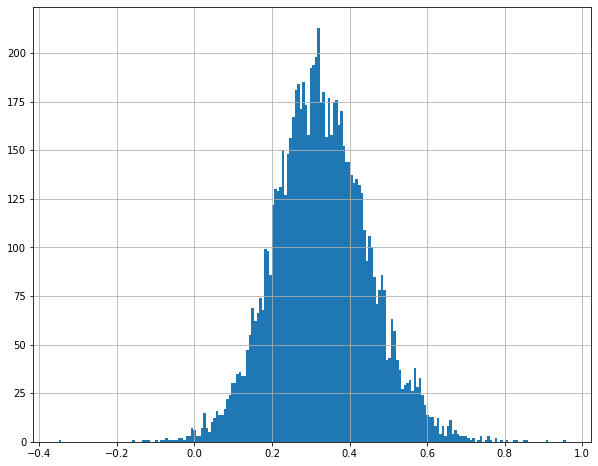

In [45]:
plt.figure(figsize = (10, 8))
reg_df.sentiment_score.hist(bins = 200)

<AxesSubplot:>

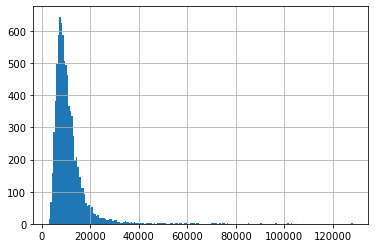

In [42]:
reg_df.num_views_new.hist(bins = 200)

In [46]:
reg_df.num_bids.mean()

28.363322211630123